In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1)
from IPython import display

In [ ]:

path= '/content/diabetes.csv'
data= pd.read_csv(path)
data.shape

(768, 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
data = data.to_numpy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def scale(df):
  """
  Parameters
  -------
    x: dataframe

  Returns
  -------
    x_scaled: dataframe

  """
  x = data[:,:-1]
  x_scaled= (x- np.mean(x,axis= 0))/np.std(x,axis= 0)

  return x_scaled

In [ ]:
def split_data(df, train_percent= 0.8):
  """
  Parameters
  -------
    df: a dataframe
    train_percent: a float


  Returns
  -------


    x_train: an array
    x_test: an array
    y_train: an array
    y_test: an array

  """
  x_scale = scale(data)
  y = data[:,-1]
  #y = y.reshape(-1,1)
  n = x_scale.shape[0]
  indices = np.arange(n)
  data_suffle = np.random.permutation(data)
  n,m = data_suffle.shape
  train_idx = indices[:round(n*train_percent)]
  test_idx = indices[round(n*train_percent):]
  x_train = x_scale[train_idx]
  y_train = y[train_idx]
  x_test = x_scale[test_idx]
  y_test = y[test_idx]

  return x_train, x_test ,y_train ,y_test

In [ ]:
x_train, x_test ,y_train ,y_test= split_data(data, train_percent= 0.8)
x_train.shape, x_test.shape, y_train.shape ,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
def sigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1/(1+exp(-x))

      a list of value between 0 and 1

  """
  sigmoid = 1/(1+np.exp(-x))
  return sigmoid

In [ ]:
def dsigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: sigmoid(x)*(1- sigmoid(x))

      a list of value of the derivative of sigmoid
  """

  dsigmoid = sigmoid(x)*(1-sigmoid)
  return dsigmoid

In [ ]:
def cross_entropy(y,y_pred):
  """
  Parameters
  ----------
    y: an array
    y_pred: array

  return
  ------
   : float
  """
  loss= -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  return loss

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x: an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)

  Return
  ------
    z1: an array of shape (N, hidden_dim)
    a1: an array of shape (N, hidden_dim)
    z2: an array of shape (N, output_dim)
    a2: an array of shape (N, output_dim)
  """
  z1= w1@x.T + b1
  a1= sigmoid(z1)

  z2= w2@ a1 + b2
  a2= sigmoid(z2)


  return z1, a1, z2, a2

In [ ]:
def backwardpass(x,y, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)

  Return
  ------
    dw1: an array of shape (hidden_dim, input_dim)
    db1: an array of shape (hidden_dim, 1). Bias vector
    dw2: an array of shape (output_dim, hidden_dim)
    db2: an array of shape (1, 1)
  """

  # Forward pass
  z1, a1, z2, a2=forward_pass(x, w1, b1, w2, b2)

  #Backward
  dz2=(1/x.shape[0])*(a2-y)
  dw2= dz2@a1.T
  db2= (1/x.shape[0])* np.sum(dz2,axis =1,keepdims=True)



  dz1 = w2.T@ dz2 * a1*(1-a1)
  dw1= dz1 @ x
  db1= np.sum(dz1,axis=1 , keepdims= True)

  return dw1, db1, dw2, db2

In [ ]:
def train(x,y, x_val, y_val):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)

  Return
  ------
    cost: an array of shape (num_epochs, )
    cost_test: an array of shape (num_epochs, ).
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  """
  input_dim= x.shape[1] # number of features
  hidden_dim= 16 # number of units in the hideen layer
  output_dim= 1 # number of units in the output layer
  w1 = np.random.rand(hidden_dim, input_dim)*0.01 # (hidden_dim, input_dim)
  b1 = np.random.rand(hidden_dim, 1) # (hidden_dim, 1)

  w2 = np.random.rand(output_dim, hidden_dim)*0.01 # (output_dim, hidden_dim)
  b2 = np.random.rand(output_dim, 1) # (output_dim, 1)
  lr = 0.001
  num_epochs = 1000

  cost =[]
  cost_test= []

  for i in range(num_epochs):
      # Backward Pass
      dw1, db1, dw2, db2 = backwardpass(x,y, w1, b1, w2, b2)

      # Update weights
      w1 = w1 - lr*dw1
      b1 = b1 - lr* db1


      w2 = w2 - lr*dw2
      b2=  b2 - lr*b2

      # Get the Train Loss
      # apply forward to get z1, a1, z2 and a2
      z1, a1, z2, a2 = forward_pass(x, w1, b1, w2, b2)

      #Compute the loss
      loss_tain = cross_entropy(y,a2)
      cost.append(loss_tain)


      # Get the Test Loss
      # apply forward to get z1, a1, z2 and a2 using x_val

      z1, a1, z2, a2_val = forward_pass(x_val, w1, b1, w2, b2)
      loss_test =  cross_entropy(y_val,a2_val)
      cost_test.append(loss_test)

  return cost, cost_test, w1, b1, w2, b2

In [ ]:
cost, cost_test, w1, b1, w2, b2 = train(x_train,y_train,x_test, y_test)

In [ ]:
def accuracy(y, y_pred):
  acc= np.mean(y == y_pred)*100
  return acc

In [ ]:
threshold= 0.5
def get_class(x):
  _,_,_,proba= forward_pass(x, w1, b1, w2, b2) # Get probability of x
  proba= proba.squeeze(0)
  result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
  return np.array(result), proba

In [ ]:
cost, cost_test, w1, b1, w2, b2= train(x_train,y_train, x_test, y_test)

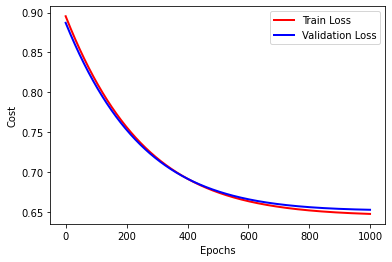

In [ ]:
def plot(cost, cost_test):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(np.arange(len(cost)), cost, 'r', linewidth = "2", label= 'Train Loss')
  plt.plot(np.arange(len(cost_test)), cost_test, 'b', linewidth = "2", label= 'Validation Loss')
  plt.legend()
  plt.show()

plot(cost, cost_test)

In [ ]:
y_pred, y_proba= get_class(x_test)

In [ ]:
accuracy(y_test, y_pred)

64.28571428571429

# NN Class

In [ ]:
# BGD
class NN:
  def __init__(self, x_test, y_test, size, num_epochs= 1000, lr= 0.001, threshold= 0.5):
    self.num_epochs= num_epochs
    self.lr= lr
    self.threshold= threshold
    self.cost_train= []
    self.size= size
    self.x_test= x_test
    self.y_test= y_test
    self.params= self.weight_initialization()

  def sigmoid(self,x):
    return sigmoid(x)

  def dsigmoid(self,x):
    return dsigmoid(x)


  def cross_entropy(self,y,y_pred):
    loss= cross_entropy(y,y_pred)
    return loss

  def weight_initialization(self):
    input_dim= self.size[0]
    hidden_dim= self.size[1]
    output_dim= self.size[2]


    params = {
            'w1':np.random.rand(hidden_dim, input_dim)*0.01,
            'b1':np.random.rand(hidden_dim ,1),
            'w2':np.random.rand(output_dim, hidden_dim)*0.01,
            'b2':np.random.rand(1,1)
        }

    return params

  def forward_pass(self, x):
    params= self.params


    # ForwardPass
    z1, a1, z2, a2 = forward_pass(x, params['w1'],params['b1'],params['w2'], params['b2'])

    return z1, a1, z2, a2

  def backward_pass(self, x, y):
    params= self.params



    # Backward

    dw1, db1, dw2, db2 = backwardpass(x,y, params['w1'],params['b1'],params['w2'], params['b2'])

    return dw1, db1, dw2, db2

  def fit(self, x, y):


    for i in range(self.num_epochs):

      # Get Params
      params= self.params
      dw1, db1, dw2, db2 = self.backward_pass(x, y)


      params['w1']= params['w1'] - self.lr* dw1
      params['b1']= params['b1'] - self.lr * db1

      params['w2']= params['w2'] - self.lr *dw2
      params['b2']= params['b2'] - self.lr * db2

      #forward propagation
      z1, a1, z2, a2 = self.forward_pass(x)

      #loss function
      loss = self.cross_entropy(y,a2)
      self.cost_train.append(loss)




  def get_class(self, x):
    w1, b1, w2, b2= self.params['w1'], self.params['b1'], self.params['w2'], self.params['b2']
    _,_,_,proba= self.forward_pass(x)
    proba= proba.squeeze(0)
    result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(self, y,y_pred):
    return accuracy(y, y_pred)
  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.legend()
    plt.show()

In [ ]:
size= [x_train.shape[1], 16, 1]
model= NN(x_test, y_test, size, num_epochs= 2000, lr= 0.001)

In [ ]:
model.fit(x_train, y_train)

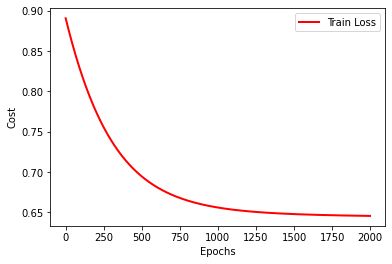

In [ ]:
model.plot()

In [ ]:
y_pred= model.get_class(x_test)

In [ ]:
model.accuracy(y_pred, y_test)

32.142857142857146